# Building Convolutional Neural Network using np from Scratch

Source: https://www.kdnuggets.com/2018/04/building-convolutional-neural-network-np-scratch.html


In [ ]:
# Import plotting, image dataset and numerical libraries
import matplotlib.pyplot as plt
import skimage.data
import numpy as np

# Import convolution, pooling and activation helpers from local utils
from utils import conv, pooling, relu

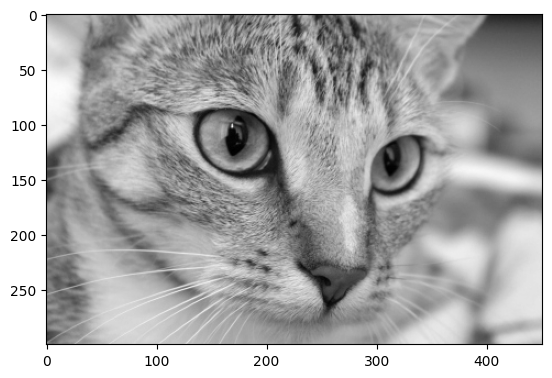

In [ ]:
# Read a sample image (Chelsea the cat) from skimage and convert to grayscale
# Converting to grayscale simplifies the example by removing channel depth
img = skimage.data.chelsea()
img = skimage.color.rgb2gray(img)

# Display the grayscale image inline
plt.imshow(img, cmap="gray")

In [ ]:
# Prepare a filter bank for the first convolutional layer
# We create two 3x3 filters. Because the input is grayscale, filters are 2D (no channel depth).
# For RGB inputs filters would have shape (n_filters, height, width, channels).
l1_filter = np.zeros((2, 3, 3))

# Filter 0: vertical edge detector (Sobel-like).
l1_filter[0, :, :] = np.array(
    [
        [
            [-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1],
        ],
    ],
)
# Filter 1: horizontal edge detector
l1_filter[1, :, :] = np.array(
    [
        [
            [1, 1, 1],
            [0, 0, 0],
            [-1, -1, -1],
        ],
    ],
)

### Filter Preparation


In [ ]:
# Apply first convolutional layer: conv -> relu -> pooling
print("Working with conv layer 1")
l1_feature_map = conv(img, l1_filter)  # raw convolution outputs for each filter
print("ReLU")
l1_feature_map_relu = relu(l1_feature_map)  # apply non-linearity
print("Pooling")
# Downsample feature maps by a factor of 2 (height and width)
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
print("End of conv layer 1")

Working with conv layer 1
Filter  1
Filter  2
ReLU
Pooling
End of conv layer 1


In [ ]:
# Second convolutional layer: increase number of filters and filter size
# Filters are randomly initialized here for demonstration (not trained).
l2_filter = np.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])
print("Working with conv layer 2")
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
print("ReLU")
l2_feature_map_relu = relu(l2_feature_map)
print("Pooling")
# Again downsample to reduce spatial dimensions
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)
print("End of conv layer 2")

Working with conv layer 2
Filter  1
Filter  2
Filter  3
ReLU
Pooling
End of conv layer 2


In [ ]:
# Third convolutional layer: typically reduces spatial size further or aggregates features
l3_filter = np.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])
print("Working with conv layer 3")
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
print("ReLU")
l3_feature_map_relu = relu(l3_feature_map)
print("Pooling")
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)
print("End of conv layer 3")

Working with conv layer 3
Filter  1
ReLU
Pooling
End of conv layer 3


## Graphing


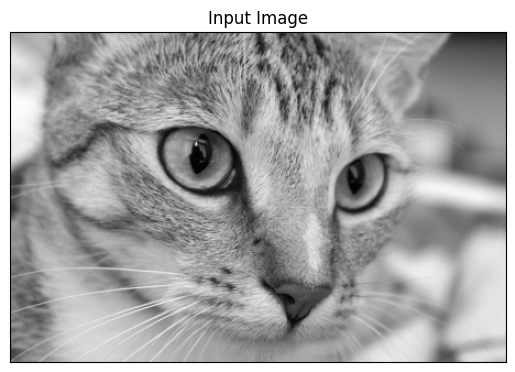

In [ ]:
# Plot and save the original input image
fig0, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])

# Save to outputs/ so results are preserved alongside the notebook
plt.savefig("outputs/input_img.png", bbox_inches="tight")
plt.show()
plt.close(fig0)

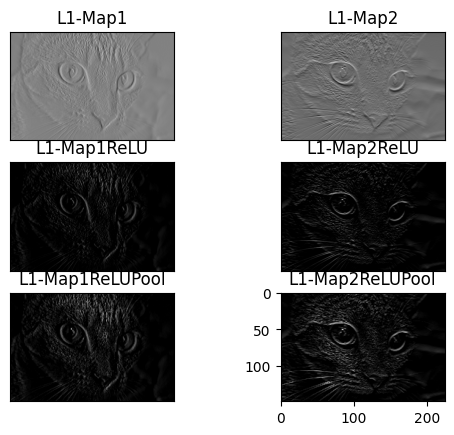

In [ ]:
# Visualize layer 1: raw feature maps, after ReLU, and after pooling
fig1, ax1 = plt.subplots(nrows=3, ncols=2)
# Raw conv outputs
ax1[0, 0].imshow(l1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0, 0].get_xaxis().set_ticks([])
ax1[0, 0].get_yaxis().set_ticks([])
ax1[0, 0].set_title("L1-Map1")

ax1[0, 1].imshow(l1_feature_map[:, :, 1]).set_cmap("gray")
ax1[0, 1].get_xaxis().set_ticks([])
ax1[0, 1].get_yaxis().set_ticks([])
ax1[0, 1].set_title("L1-Map2")

# After ReLU
ax1[1, 0].imshow(l1_feature_map_relu[:, :, 0]).set_cmap("gray")
ax1[1, 0].get_xaxis().set_ticks([])
ax1[1, 0].get_yaxis().set_ticks([])
ax1[1, 0].set_title("L1-Map1ReLU")

ax1[1, 1].imshow(l1_feature_map_relu[:, :, 1]).set_cmap("gray")
ax1[1, 1].get_xaxis().set_ticks([])
ax1[1, 1].get_yaxis().set_ticks([])
ax1[1, 1].set_title("L1-Map2ReLU")

# After pooling (downsampled)
ax1[2, 0].imshow(l1_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 0].set_title("L1-Map1ReLUPool")

ax1[2, 1].imshow(l1_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 1].set_title("L1-Map2ReLUPool")

# Save and display the figure
plt.savefig("outputs/L1.png", bbox_inches="tight")
plt.show()
plt.close(fig1)

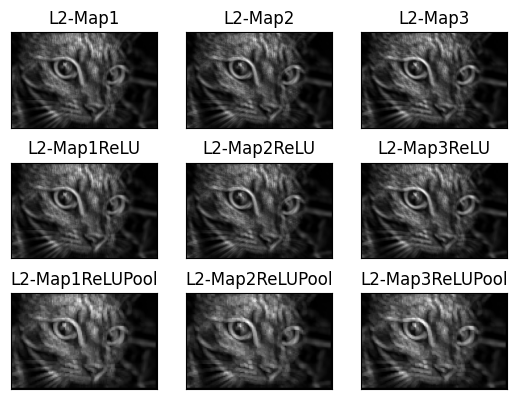

In [ ]:
# Visualize layer 2 feature maps at three stages: raw, ReLU, pooled
fig2, ax2 = plt.subplots(nrows=3, ncols=3)
# Raw conv outputs
ax2[0, 0].imshow(l2_feature_map[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")

ax2[0, 1].imshow(l2_feature_map[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")

ax2[0, 2].imshow(l2_feature_map[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")

# After ReLU
ax2[1, 0].imshow(l2_feature_map_relu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1ReLU")

ax2[1, 1].imshow(l2_feature_map_relu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2ReLU")

ax2[1, 2].imshow(l2_feature_map_relu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3ReLU")

# After pooling
ax2[2, 0].imshow(l2_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-Map1ReLUPool")

ax2[2, 1].imshow(l2_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-Map2ReLUPool")

ax2[2, 2].imshow(l2_feature_map_relu_pool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-Map3ReLUPool")

plt.savefig("outputs/L2.png", bbox_inches="tight")
plt.show()
plt.close(fig2)

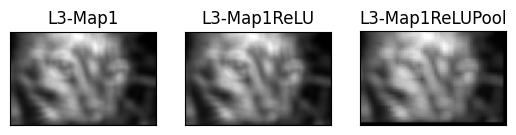

In [ ]:
# Visualize layer 3: show feature map at each processing stage
fig3, ax3 = plt.subplots(nrows=1, ncols=3)
ax3[0].imshow(l3_feature_map[:, :, 0]).set_cmap("gray")
ax3[0].get_xaxis().set_ticks([])
ax3[0].get_yaxis().set_ticks([])
ax3[0].set_title("L3-Map1")

ax3[1].imshow(l3_feature_map_relu[:, :, 0]).set_cmap("gray")
ax3[1].get_xaxis().set_ticks([])
ax3[1].get_yaxis().set_ticks([])
ax3[1].set_title("L3-Map1ReLU")

ax3[2].imshow(l3_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax3[2].get_xaxis().set_ticks([])
ax3[2].get_yaxis().set_ticks([])
ax3[2].set_title("L3-Map1ReLUPool")

plt.savefig("outputs/L3.png", bbox_inches="tight")
plt.show()
plt.close(fig3)